In [150]:
import pandas as pd

In [151]:
data = pd.read_csv("FoodType.csv")
data.head()

,Ingrediente,Docura,Crocancia,Classe
0,maca,10,9,fruta
1,bacon,1,4,proteina
2,banana,10,1,fruta
3,cenoura,7,10,vegetal
4,aipo,3,10,vegetal


In [152]:
label_train = data.pop('Classe')
data.head()
ingredient =  data.pop('Ingrediente')

In [153]:
label_train
test = {'ADocura': [6, 3], 'BCrocancia': [4, 3]}
df_test = pd.DataFrame(test)
df_test

,ADocura,BCrocancia
0,6,4
1,3,3


In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(data, label_train)
y_pred = knn.predict(df_test)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
y_pred

array(['fruta', 'proteina'], dtype=object)

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

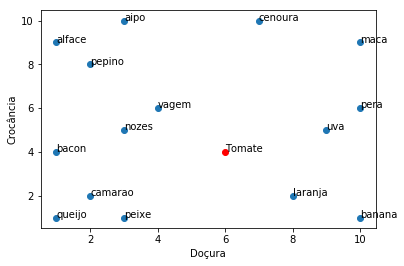

In [161]:
fig, ax = plt.subplots()
ax.scatter(data.Docura, data.Crocancia)
for i, txt in enumerate(ingredient):
    ax.annotate(txt, (data.Docura[i], data.Crocancia[i]))

ax.scatter(df_test.ADocura[0], df_test.BCrocancia[0], c='Red')
ax.annotate('Tomate', (df_test.ADocura[0], df_test.BCrocancia[0]))
plt.xlabel('Doçura')
plt.ylabel('Crocância')
